In [18]:
import pickle

# We used "train.pkl" for presentation however after assumption made was questionned
# we changed it to time_series data for further tests
file_path = 'train_ts.pkl'
with open(file_path, 'rb') as file:
    train_data = pickle.load(file)

train_data.head()

,date,exchange,q,ticker,transcript,daily_r,weekly_r,monthly_r
0,2017-11-03 00:00:00,NYSE: HOUS,2017-Q3,HOUS,prepared remark operator good morning welcome ...,-0.012159,-0.026898,-0.028371
1,2017-11-13 00:00:00,NYSE: ACM,2017-Q4,ACM,prepared remark operator good morning welcome ...,0.014994,0.060842,0.079296
2,2017-11-14 00:00:00,NYSE: ARMK,2017-Q4,ARMK,prepared remark operator lady gentleman thank ...,-0.032037,0.005869,0.050379
3,2017-11-21 00:00:00,NYSE: NJR,2017-Q4,NJR,prepared remark operator good day welcome new ...,-0.002242,0.000000,-0.110986
4,2017-11-22 00:00:00,NYSE: DE,2017-Q4,DE,prepared remark operator welcome good morning ...,0.004123,0.044390,0.099773


In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10601 entries, 0 to 10600
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        10601 non-null  object 
 1   exchange    10601 non-null  object 
 2   q           10601 non-null  object 
 3   ticker      10601 non-null  object 
 4   transcript  10601 non-null  object 
 5   daily_r     10601 non-null  float64
 6   weekly_r    10601 non-null  float64
 7   monthly_r   10601 non-null  float64
dtypes: float64(3), object(5)
memory usage: 662.7+ KB


In [20]:
train_data['transcript'].iloc[0]

'prepared remark operator good morning welcome realogy holding corporation thirdquarter 2017 earnings conference call via webcast today call recorded written transcript made available investor information section company website later today webcast replay also made available company website time would like turn call realogy senior vice president alicia swift please go ahead alicia alicia swift senior vice president thank amy good morning welcome realogys thirdquarter 2017 earnings conference call call today realogys realogys chairman ceo president richard smith president chief operating officer ryan schneider chief financial officer tony hull shown slide three presentation company making statement future result forwardlooking statement call statement based current expectation current economic environment forwardlooking statement projection inherently subject significant economic competitive uncertainty contingency many beyond control management actual result may differ materially expre

In [21]:
# Splitting into classes based on weekly returns 
def class_setup(df, r1, r2):
    df['class'] = 2  # Default class
    df.loc[df['weekly_r'] > r1, 'class'] = 1
    df.loc[df['weekly_r'] < r2, 'class'] = 3
    return df 

In [22]:
train_data = class_setup(train_data, 0.03, -0.03) 

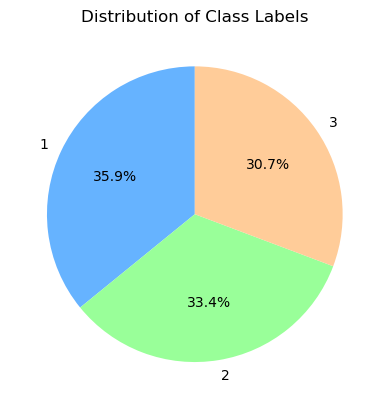

In [23]:
import matplotlib.pyplot as plt

# Assuming 'train_data' is your DataFrame and 'class' is the column with class labels
class_distribution = train_data['class'].value_counts()

# Define a list of colors for the pie chart; add more colors if you have more than five classes
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff6666', '#c2c2f0']

# Plotting the class distribution as a pie chart
class_distribution.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Class Labels')
plt.ylabel('')  # Hide the y-label as it's not necessary for pie charts
plt.show()

In [24]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import names   

# Adding more specific stop words 
all_names = set(names.words())
custom_stop_words = list(ENGLISH_STOP_WORDS) + ['chief', 'executive', 'financial', 'officer', 'president', 'vice', 'quarter', 'year', 'morning', 'think', 'analyst','chairman']
custom_stop_words = custom_stop_words + list(all_names)

# Constructing vectorizer and using it to vectorize the data
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, min_df=0.05, max_df=0.8, max_features=40, ngram_range=(1, 2))
vectorized_data = vectorizer.fit_transform(train_data['transcript'])


c:\Users\georg\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aamir', 'aaron', 'abagael', 'abagail', 'abbe', 'abbey', 'abbi', 'abbie', 'abbot', 'abbott', 'abby', 'abdel', 'abdul', 'abdulkarim', 'abdullah', 'abe', 'abel', 'abelard', 'abigael', 'abigail', 'abigale', 'abner', 'abra', 'abraham', 'abram', 'acacia', 'ace', 'ada', 'adah', 'adair', 'adaline', 'adam', 'adams', 'adara', 'addie', 'addis', 'adel', 'adela', 'adelaide', 'adele', 'adelice', 'adelina', 'adelind', 'adeline', 'adella', 'adelle', 'adena', 'adey', 'adger', 'adi', 'adiana', 'adina', 'aditya', 'adlai', 'adnan', 'adolf', 'adolfo', 'adolph', 'adolphe', 'adolpho', 'adolphus', 'adora', 'adore', 'adoree', 'adorne', 'adrea', 'adria', 'adriaens', 'adrian', 'adriana', 'adriane', 'adrianna', 'adrianne', 'adrick', 'adrien', 'adriena', 'adrienne', 'aeriel', 'aeriela', 'aeriell', 'ag', 'agace', 'ag

In [25]:
import pandas as pd
# Loading the test data - replace 'your_test_data.pkl' with the actual path to your .pkl file
test_data = pd.read_pickle('test_ts.pkl')

test_data.head()

,date,exchange,q,ticker,transcript,daily_r,weekly_r,monthly_r
10601,2021-11-02 00:00:00,NASDAQ: ZYXI,2021-Q3,ZYXI,prepared remark operator good day welcome zyne...,-0.030977,0.134234,-0.249404
10602,2021-11-02 00:00:00,NYSE: COUR,2021-Q3,COUR,prepared remark operator lady gentleman thank ...,-0.023762,-0.029137,-0.280905
10603,2021-11-02 00:00:00,NASDAQ: OTTR,2021-Q3,OTTR,prepared remark operator good morning welcome ...,-0.007384,0.053417,0.060644
10604,2021-11-02 00:00:00,NYSE: AYX,2021-Q3,AYX,prepared remark operator greeting welcome alte...,-0.006112,-0.011959,-0.174196
10605,2021-11-02 00:00:00,NYSE: RAMP,2022-Q2,RAMP,prepared remark operator good afternoon lady g...,0.032662,-0.034295,-0.144257


In [26]:
X_train = vectorizer.fit_transform(train_data['transcript'])
X_test = vectorizer.transform(test_data['transcript'])

y_train = train_data['class'] 

In [27]:
from catboost import CatBoostClassifier, Pool
import numpy as np
from scipy.sparse import csr_matrix, isspmatrix

# CatBoostClassifier for multi-class classification
model = CatBoostClassifier(
    iterations=200,         # Number of iterations
    depth=6,                # Depth of the trees
    learning_rate=0.1,      # Learning rate
    loss_function='MultiClass',  # Loss function for multi-class classification
    verbose=True,           # Verbose output
    thread_count=-1         # Use all available cores
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
preds_class = model.predict(X_test)

0:	learn: 1.0950574	total: 121ms	remaining: 24.2s
1:	learn: 1.0918359	total: 161ms	remaining: 15.9s
2:	learn: 1.0880825	total: 192ms	remaining: 12.6s
3:	learn: 1.0851622	total: 219ms	remaining: 10.8s
4:	learn: 1.0824754	total: 331ms	remaining: 12.9s
5:	learn: 1.0808866	total: 380ms	remaining: 12.3s
6:	learn: 1.0785787	total: 416ms	remaining: 11.5s
7:	learn: 1.0760046	total: 445ms	remaining: 10.7s
8:	learn: 1.0738775	total: 472ms	remaining: 10s
9:	learn: 1.0714259	total: 587ms	remaining: 11.1s
10:	learn: 1.0694245	total: 640ms	remaining: 11s
11:	learn: 1.0672491	total: 676ms	remaining: 10.6s
12:	learn: 1.0648195	total: 708ms	remaining: 10.2s
13:	learn: 1.0633056	total: 735ms	remaining: 9.76s
14:	learn: 1.0613653	total: 844ms	remaining: 10.4s
15:	learn: 1.0598885	total: 891ms	remaining: 10.2s
16:	learn: 1.0584462	total: 925ms	remaining: 9.96s
17:	learn: 1.0572368	total: 954ms	remaining: 9.65s
18:	learn: 1.0559420	total: 983ms	remaining: 9.36s
19:	learn: 1.0543223	total: 1.1s	remaining: 9

197:	learn: 0.9020941	total: 10.2s	remaining: 103ms
198:	learn: 0.9013776	total: 10.3s	remaining: 51.6ms
199:	learn: 0.9005143	total: 10.3s	remaining: 0us


In [28]:
from sklearn.metrics import confusion_matrix

test_data['preds_class'] = preds_class

df_test = class_setup(test_data, 0.03, -0.03)
y_true = df_test['class'] 
y_pred = test_data['preds_class']

confusion_matrix(y_true, y_pred)

array([[662, 460, 642],
       [491, 533, 370],
       [685, 476, 881]], dtype=int64)

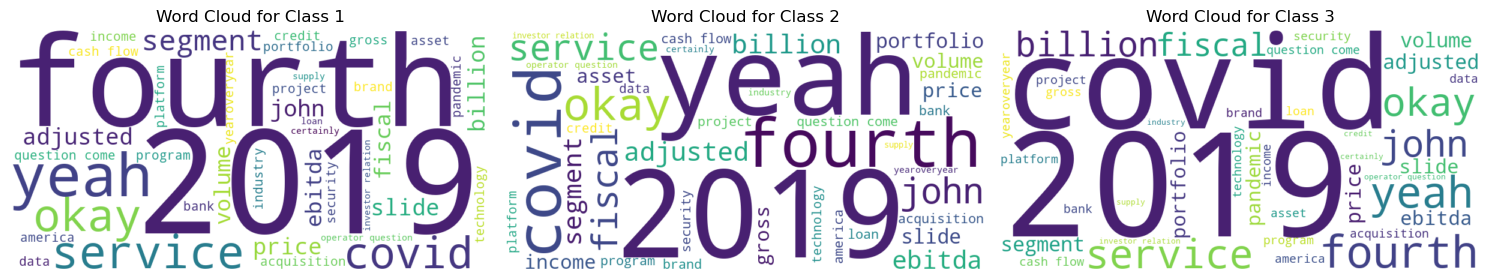

In [29]:
import numpy as np
from wordcloud import WordCloud

# Assume vectorizer and train_data have been prepared and vectorized_data is ready
feature_names = vectorizer.get_feature_names_out()

# Get the total number of classes
classes = test_data['preds_class'].unique()

plt.figure(figsize=(15, 10))

for i, label in enumerate(classes):
    # Filter rows belonging to the current class
    class_rows = test_data['preds_class'] == label
    # Sum term frequencies for the current class
    class_term_matrix = vectorized_data[class_rows]
    class_term_freq = np.array(class_term_matrix.sum(axis=0)).flatten()
    
    # Create a dictionary mapping terms to their frequencies
    freq_dict = dict(zip(feature_names, class_term_freq))
    
    # Generate WordCloud
    class_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white', random_state=42).generate_from_frequencies(freq_dict)
    
    # Plot
    plt.subplot(2, 3, i + 1)  # Adjust the subplot layout parameters as needed
    plt.imshow(class_wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Class {label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [30]:
class_to_coefficient = {
    1: 1,
    2: 0,
    3: -1
}

test_data['alpha'] = test_data['preds_class'].map(class_to_coefficient)

In [31]:
df = test_data[['alpha']]

df.to_csv('C:/Users/georg/IF Master/MA2/ML/final proj/nc_cat_40features.csv', index=True)

In [34]:
# Tuning hyperparameters
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'iterations': [50, 100, 200, 500],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'depth': [3, 6, 10]
}

# Initialize the CatBoost model
catb_model = CatBoostClassifier(loss_function='MultiClass', verbose=True, thread_count=-1, random_state=42)

# Initialize GridSearchCV with the parameter grid
grid_search = GridSearchCV(estimator=catb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
0:	learn: 1.0985839	total: 5.16ms	remaining: 253ms
1:	learn: 1.0985530	total: 9.22ms	remaining: 221ms
2:	learn: 1.0985222	total: 13.1ms	remaining: 205ms
3:	learn: 1.0984985	total: 17ms	remaining: 195ms
4:	learn: 1.0984692	total: 20.1ms	remaining: 181ms
5:	learn: 1.0984392	total: 23ms	remaining: 169ms
6:	learn: 1.0984127	total: 25.5ms	remaining: 157ms
7:	learn: 1.0983881	total: 28.1ms	remaining: 147ms
8:	learn: 1.0983540	total: 30.4ms	remaining: 139ms
9:	learn: 1.0983260	total: 32.7ms	remaining: 131ms
10:	learn: 1.0982994	total: 35ms	remaining: 124ms
11:	learn: 1.0982685	total: 37.3ms	remaining: 118ms
12:	learn: 1.0982415	total: 39.4ms	remaining: 112ms
13:	learn: 1.0982094	total: 41.5ms	remaining: 107ms
14:	learn: 1.0981812	total: 43.3ms	remaining: 101ms
15:	learn: 1.0981551	total: 45.5ms	remaining: 96.7ms
16:	learn: 1.0981232	total: 47.6ms	remaining: 92.4ms
17:	learn: 1.0980945	total: 49.9ms	remaining: 88.8ms
18:	learn: 1.098

In [37]:
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

Best Parameters: {'depth': 6, 'iterations': 50, 'learning_rate': 0.1}
Best Cross-Validation Score: 0.3918500816379032


In [35]:
# Predict the classes for the test data
predicted_classes = best_model.predict(X_test)

# Add the predicted classes to the test data DataFrame (assuming test_data exists)
test_data['predicted_class'] = predicted_classes

df_test = class_setup(test_data, 0.03, -0.03)
y_true = df_test['class'] 
y_pred = test_data['predicted_class']

confusion_matrix(y_true, y_pred)

array([[722, 430, 612],
       [532, 532, 330],
       [804, 417, 821]], dtype=int64)

In [36]:
class_to_coefficient = {
    1: 1,
    2: 0,
    3: -1
}

test_data['alpha'] = test_data['preds_class'].map(class_to_coefficient)

In [ ]:
df = test_data[['alpha']]

df.to_csv('C:/Users/georg/IF Master/MA2/ML/final proj/nc_cat_opt_40_feautures.csv', index=True)